# 📦 Imports

In [25]:
# easy file access
import os
# datetime manipulation
import datetime as dt
# dataframes & arrays
import pandas as pd
import numpy as np
# visualizations
import seaborn as sns
import matplotlib.pyplot as plt
# clear warnings
import warnings
warnings.filterwarnings("ignore")
# request
import requests
# metrics
from sklearn import metrics
# scripts
import wrangle as w
import env

# ≝ Default Settings

In [26]:
# Pandas
pd.set_option('display.max_colwidth', None)
# Matplotlib
plt.style.use('fivethirtyeight')

# 🗂️ Acquire & Prepare

In [27]:
df = w.get_curriculum_data()

# logs contains cohort data
logs = pd.read_csv('logs.csv')

File exists, pulling from system. (logs.csv)
File exists, pulling from system. (data.txt)


In [28]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
datetime,,,,,,,,,,
2018-01-26 09:55:03,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,Web Dev 1
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,Web Dev 1
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,Web Dev 1
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,Web Dev 1
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,Fullstack


In [29]:
df.shape

(900223, 10)

In [30]:
# keeping an extra column off index for modification purposes
df['time'] = df.index

In [31]:
w.summarize(df)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,dtype
9,program_id,5,"[Web Dev 1, Fullstack, nan, Front End WD, Staff, Data Science]",52893,object
7,created_at,37,"[2016-06-14 19:52:26, 2018-01-08 13:59:10, 2017-09-27 20:22:41, 2016-10-26 02:34:05, 2017-03-28 00:33:12, 2017-06-05 20:12:10, nan, 2016-07-18 19:06:27, 2016-09-26 15:58:53, 2017-02-06 17:49:10, 2018-03-05 14:22:11, 2018-05-25 22:25:57, 2018-07-23 15:02:25, 2018-09-17 19:09:51, 2018-11-05 15:26:37, 2018-12-06 17:04:19, 2019-01-20 23:18:57, 2019-03-18 20:35:06, 2019-05-28 18:41:05, 2019-07-15 16:57:21, 2019-08-20 14:38:55, 2019-09-16 13:07:04, 2019-11-04 18:27:07, 2020-01-13 21:17:08, 2020-02-03 19:31:51, 2020-02-24 15:39:33, 2020-03-23 17:52:16, 2020-05-26 19:22:44, 2020-07-13 18:32:19, 2020-07-20 19:04:00, 2020-09-21 18:06:27, 2020-11-02 20:43:58, 2020-12-07 16:58:43, 2020-12-07 15:20:18, 2021-01-20 21:31:11, 2021-03-15 19:57:09, 2021-03-15 18:18:20, 2021-04-12 18:07:21]",52893,object
8,updated_at,37,"[2016-06-14 19:52:26, 2018-01-08 13:59:10, 2017-09-27 20:22:41, 2016-10-26 14:30:19, 2017-03-28 00:33:12, 2017-06-05 20:12:10, nan, 2016-07-18 19:06:27, 2016-09-26 15:58:53, 2017-02-06 17:49:10, 2018-03-05 14:22:11, 2018-05-25 22:25:57, 2018-07-23 15:02:25, 2018-09-17 19:09:51, 2018-11-05 15:26:37, 2018-12-06 17:04:19, 2019-01-20 23:18:57, 2019-03-18 20:35:06, 2019-05-28 18:41:05, 2019-07-15 16:57:21, 2019-08-20 14:38:55, 2019-09-16 13:07:04, 2019-11-04 18:27:07, 2020-01-13 21:17:08, 2020-02-03 19:31:51, 2020-07-29 18:41:13, 2020-03-23 17:52:16, 2020-05-26 19:22:44, 2020-07-13 18:32:19, 2020-09-30 15:54:46, 2020-09-21 18:06:27, 2020-11-02 20:43:58, 2020-12-07 16:58:43, 2020-12-07 15:20:18, 2021-01-20 21:31:11, 2021-03-15 19:57:09, 2021-03-15 18:18:20, 2021-04-12 18:07:21]",52893,object
5,start_date,44,"[2015-09-22, 2018-01-08, 2017-09-27, 2014-02-04, 2016-10-26, 2017-03-27, 2017-06-05, nan, 2016-05-23, 2016-07-18, 2016-09-26, 2015-06-05, 2014-10-20, 2016-03-08, 2017-02-06, 2018-03-05, 2014-06-04, 2015-03-30, 2016-01-20, 2018-05-29, 2018-07-23, 2018-09-17, 2015-02-03, 2018-11-05, 2019-01-22, 2019-03-18, 2019-05-28, 2019-07-15, 2019-08-19, 2019-09-16, 2019-11-04, 2020-01-13, 2020-02-03, 2020-02-24, 2020-03-23, 2014-11-18, 2020-05-26, 2020-07-13, 2020-07-20, 2020-09-21, 2020-11-02, 2020-12-07, 2021-01-25, 2021-03-15, 2021-04-12]",52893,object
6,end_date,45,"[2016-02-06, 2018-05-17, 2018-02-15, 2014-04-22, 2017-03-09, 2017-07-20, 2017-09-22, nan, 2016-09-15, 2016-11-10, 2017-02-02, 2015-10-06, 2015-01-18, 2016-06-30, 2017-05-25, 2018-07-19, 2014-08-22, 2015-07-29, 2016-05-12, 2018-10-11, 2018-11-29, 2019-02-08, 2015-05-26, 2019-04-03, 2014-02-04, 2019-06-04, 2019-07-30, 2019-10-08, 2019-12-11, 2020-01-30, 2020-02-27, 2020-04-17, 2020-06-23, 2020-07-07, 2020-07-29, 2020-08-20, 2015-02-24, 2020-11-10, 2021-01-12, 2021-01-21, 2021-03-30, 2021-05-04, 2021-06-08, 2021-07-19, 2021-09-03, 2021-10-01]",52893,object
4,name,47,"[Hampton, Teddy, Sequoia, Arches, Niagara, Pinnacles, Quincy, nan, Kings, Lassen, Mammoth, Glacier, Denali, Joshua, Olympic, Ulysses, Badlands, Apollo, Ike, Voyageurs, Wrangell, Xanadu, Franklin, Yosemite, Staff, Zion, Andromeda, Betelgeuse, Ceres, Bayes, Deimos, Europa, Fortuna, Curie, Apex, Ganymede, Everglades, Hyperion, Darden, Bash, Jupiter, Kalypso, Luna, Easley, Marco, Neptune, Florence, Oberon]",52893,object
2,cohort_id,48,"[8, 22, 21, 1, 16, 18, 19, -1, 13, 14, 15, 7, 4, 12, 17, 23, 2, 9, 11, 24, 25, 26, 6, 27, 28, 29, 31, 32, 33, 34, 51, 52, 53, 55, 56, 57, 5, 58, 59, 61, 62, 132, 134, 133, 135, 138, 137, 139]",0,int64
1,user_id,981,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]

In [32]:
w.summarize_df(df)

=====   SHAPE   =====
(900223, 11)
=====   INFO   =====
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        900222 non-null  object        
 1   user_id     900223 non-null  int64         
 2   cohort_id   900223 non-null  int64         
 3   ip          900223 non-null  object        
 4   name        847330 non-null  object        
 5   start_date  847330 non-null  object        
 6   end_date    847330 non-null  object        
 7   created_at  847330 non-null  object        
 8   updated_at  847330 non-null  object        
 9   program_id  847330 non-null  object        
 10  time        900223 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 82.4+ MB
None
=====   DESCRIBE   =====
|           |   count | mean                          | min   

### Anomalyous Behavior # 1
    no cohort ID should be a null
    
    Also missing values in name and program id -- this is likely the same group

# 🗺️ Explore

### Start by seeing which programs have the most activity

In [212]:
round(df.program_id.value_counts(normalize=True)*100, 4)

program_id
Fullstack       74.2726
Data Science    12.2045
Staff            9.9172
Web Dev 1        3.6052
Front End WD     0.0006
Name: proportion, dtype: float64

In [34]:
df.program_id.unique()

array(['Web Dev 1', 'Fullstack', nan, 'Front End WD', 'Staff',
       'Data Science'], dtype=object)

# Questions

## Question 1

    1. Which lesson appears to attract the most traffic

    Answer:
        - Javascript I is most popular for Web Devs
        - Classification overview would be for Data Science / DS fundamentals is a close 2nd consistently across cohorts (per program)?

In [35]:
# partioning data into 5 dfs by program id & excluding staff
    # wd combined
wd = df[(df.program_id == 'Web Dev 1') | (df.program_id == 'Front End WD') | (df.program_id == 'Fullstack')]
wd1 = df[(df.program_id == 'Web Dev 1')]
fs = df[df.program_id == 'Fullstack']
front = df[df.program_id == 'Front End WD']
    # ds
ds = df[df.program_id == 'Data Science']

# dataframe exclusively for staff (i guess)
staff = df[df.name == 'Staff']

In [36]:
# removing the more popular front pages of the paths for data science & webdev cohorts

    #ds
dspath = ds[(ds.path != '/') & (ds.path != 'search/search_index.json') & (ds.path != 'toc')]
    #wd
wdpath = wd[(wd.path != '/') & (wd.path != 'search/search_index.json') & (wd.path != 'toc') & (wd.path != 'mkdocs/search_index.json') & (wd.path != 'index.html')]

<Axes: xlabel='path'>

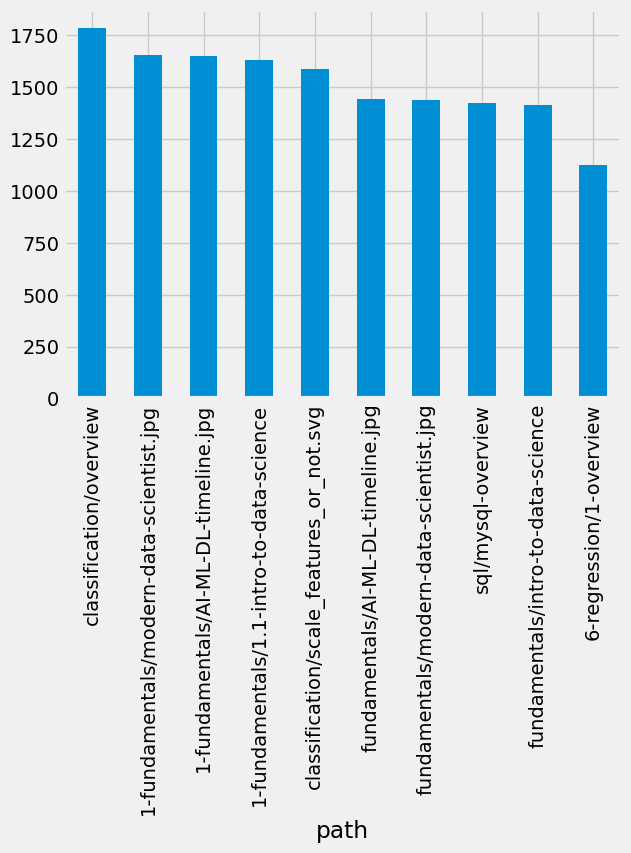

In [37]:
# top 10 paths for all programs & cohorts
ds[(ds.path != '/') & (ds.path != 'search/search_index.json') & (ds.path != 'toc')].groupby('path')['program_id'].count().sort_values(ascending=False).head(10).plot(kind='bar')

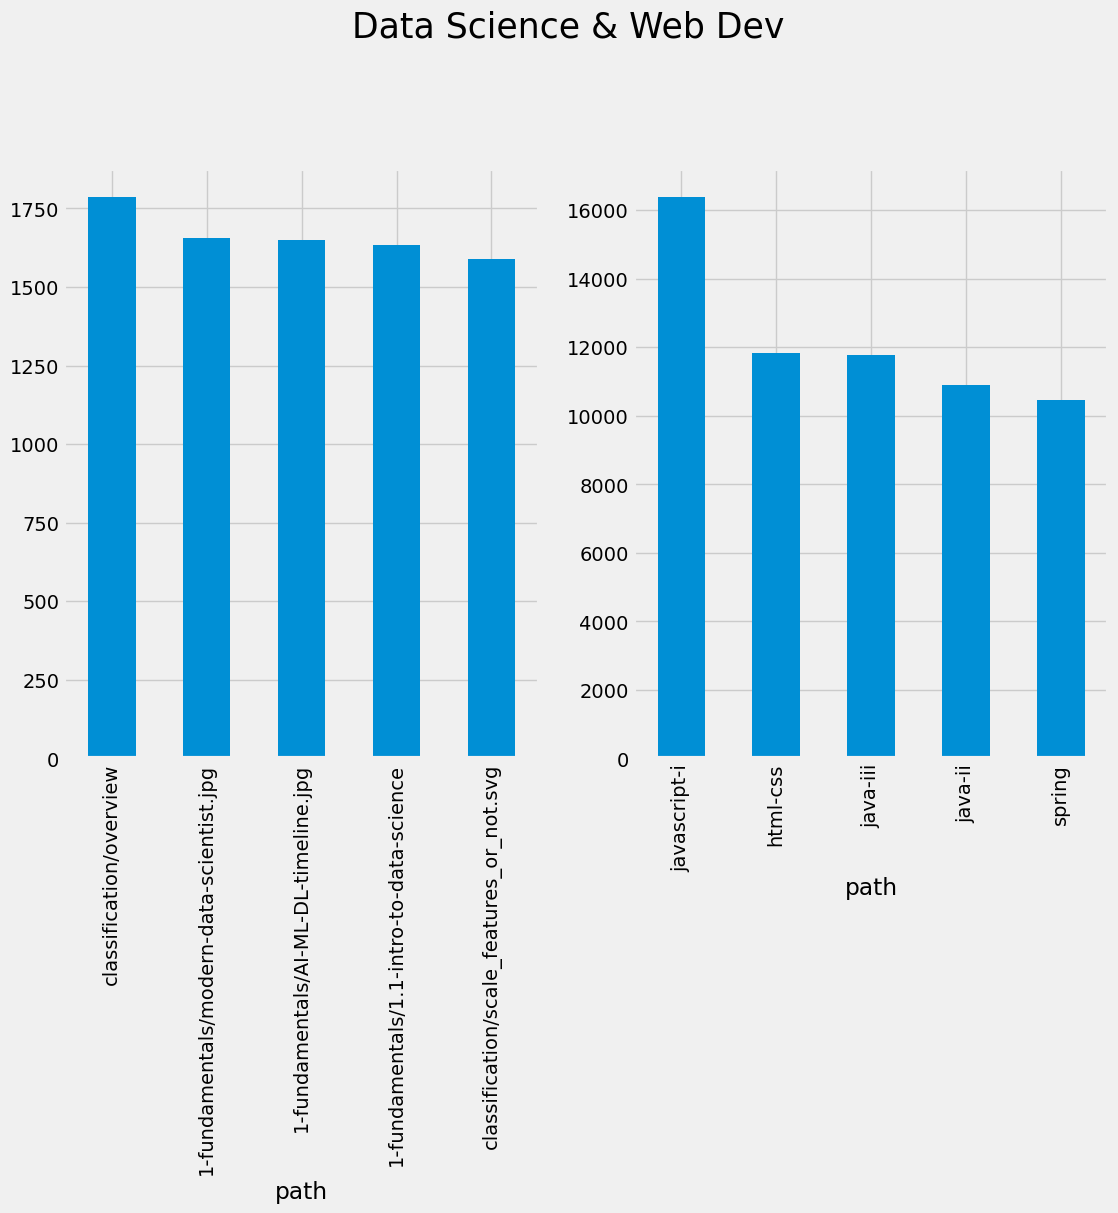

In [38]:
# visualization of most popular data science courses and webdev
# there is more info than this suggests -- paths (course names have had different names)
# which may mean that this would not be the most accurate picture for webdev cohorts as they have been combined

plt.figure(figsize=(12,16))
plt.subplot(2,2,1)
dspath.groupby(['path'])['path'].count().sort_values(ascending=False).head().plot(kind='bar')
plt.subplot(2,2,2)
wdpath.groupby(['path'])['path'].count().sort_values(ascending=False).head().plot(kind='bar')
plt.suptitle('Data Science & Web Dev',size=25)
plt.show()

## Question 2

    2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

### Finding DS lessons
- As previously mentioned the lesson format for data science does varie but reviewing the content of the top lessons per cohort will help to know

In [39]:
# removing front pages from search df, those 2 would be home pages 
dspath.path.value_counts(ascending=False).head(10)

path
classification/overview                     1785
1-fundamentals/modern-data-scientist.jpg    1655
1-fundamentals/AI-ML-DL-timeline.jpg        1651
1-fundamentals/1.1-intro-to-data-science    1633
classification/scale_features_or_not.svg    1590
fundamentals/AI-ML-DL-timeline.jpg          1443
fundamentals/modern-data-scientist.jpg      1438
sql/mysql-overview                          1424
fundamentals/intro-to-data-science          1413
6-regression/1-overview                     1124
Name: count, dtype: int64

In [40]:
# filtering group by any values that over 400
dspath.groupby(['path'])['name'].value_counts().sort_values(ascending=False).head(18)\
[dspath.groupby(['path'])['name'].value_counts().sort_values(ascending=False).head(18) > 400]

path                                            name    
classification/overview                         Darden      1109
classification/scale_features_or_not.svg        Darden       943
sql/mysql-overview                              Darden       774
1-fundamentals/modern-data-scientist.jpg        Bayes        650
1-fundamentals/AI-ML-DL-timeline.jpg            Bayes        648
1-fundamentals/1.1-intro-to-data-science        Bayes        640
fundamentals/modern-data-scientist.jpg          Florence     627
fundamentals/AI-ML-DL-timeline.jpg              Florence     624
fundamentals/intro-to-data-science              Florence     615
anomaly-detection/AnomalyDetectionCartoon.jpeg  Darden       612
6-regression/1-overview                         Curie        595
anomaly-detection/overview                      Darden       592
6-regression/1-overview                         Bayes        521
1-fundamentals/AI-ML-DL-timeline.jpg            Darden       470
1-fundamentals/modern-data-scient

In [41]:
# an easier way to view top 5 paths for each cohort
cohorts = ds.name.unique().tolist()
for i in cohorts:
    print(dspath[dspath.name == i].groupby(['path'])['name'].value_counts().sort_values(ascending=False).head())

path                                               name 
1-fundamentals/modern-data-scientist.jpg           Bayes    650
1-fundamentals/AI-ML-DL-timeline.jpg               Bayes    648
1-fundamentals/1.1-intro-to-data-science           Bayes    640
6-regression/1-overview                            Bayes    521
10-anomaly-detection/AnomalyDetectionCartoon.jpeg  Bayes    387
Name: count, dtype: int64
path                                      name 
6-regression/1-overview                   Curie    595
1-fundamentals/modern-data-scientist.jpg  Curie    467
1-fundamentals/AI-ML-DL-timeline.jpg      Curie    465
1-fundamentals/1.1-intro-to-data-science  Curie    461
3-sql/1-mysql-overview                    Curie    441
Name: count, dtype: int64
path                                            name  
classification/overview                         Darden    1109
classification/scale_features_or_not.svg        Darden     943
sql/mysql-overview                              Darden     774
anom

## Answer # 2 Note
    I appears Data Science cohorts have been pretty consistent across the board not a whole lot of anomylous behavior from those that have assigned cohorts

# Finding Webdev lessons

In [42]:
# looking to remove those front page / indexes contents once again
wd.path.value_counts(ascending=False).head(10)

path
/                           31156
toc                         16669
javascript-i                16376
search/search_index.json    13982
html-css                    11827
java-iii                    11769
java-ii                     10913
spring                      10474
jquery                      10120
mysql                        9707
Name: count, dtype: int64

In [43]:
# looping through a groupby for each individual cohort to get a better grasp of what courses they were referencing more frequently
cohorts = wd.name.unique().tolist()

for name in cohorts:   
    print('\n')
    print('++++++++++++++++++++')
    print(f'Cohort name: {name}')

    print(round(wdpath[(wdpath.name == name)].groupby(['name','cohort_id','program_id'])['path'].value_counts(normalize=True).sort_values(ascending=False).head(12) * 100))


# Franklin Cohort - javascript-ii/es6
# Badlands Cohort - content/php_ii/command-line




++++++++++++++++++++
Cohort name: Hampton
name     cohort_id  program_id  path                 
Hampton  8          Web Dev 1   java-iii                 4.0
                                appendix                 4.0
                                java-i                   3.0
                                java-ii                  3.0
                                spring                   3.0
                                javascript-i             2.0
                                javascript-ii            2.0
                                java-iii/servlets        2.0
                                mysql                    2.0
                                java-iii/jsp-and-jstl    2.0
                                jquery                   2.0
                                java-iii/jdbc            2.0
Name: proportion, dtype: float64


++++++++++++++++++++
Cohort name: Teddy
name   cohort_id  program_id  path                  
Teddy  22         Fullstack   spring      

## Answer # 2
    Oberon Cohort (139) - accessed the javascript-i course work most frequently with it being 77% of their hits

## Question 5

    At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off.
    Do you see any evidence of that happening? Did it happen before?


In [140]:
# changing date back to end of 2019
timeback = df.index.max() - dt.timedelta(days = 250)
# to get to 12-31-2019 timedelta will be 477 days
usecheck = df[df.index < timeback]

timeback

Timestamp('2020-08-14 16:44:39')

In [141]:
df[df.path == '1-fundamentals/1.1-intro-to-data-science'].name.value_counts().sort_values(ascending=False)
# when followingg the '1-fundamentals/1.1-intro-to-data-science' format - there is a mix of programs and cohorts that would access this curriculum
# the likely actual DS classes are those having over 100 hits

# of all these courses only Bayes, Curie, Darden, Florence and Easley are labeled as Data Science cohorts

name
Bayes         640
Curie         461
Darden        460
Staff         451
Florence       64
Betelgeuse      9
Easley          8
Ceres           7
Glacier         7
Sequoia         5
Voyageurs       3
Ulysses         3
Teddy           2
Quincy          2
Andromeda       1
Lassen          1
Name: count, dtype: int64

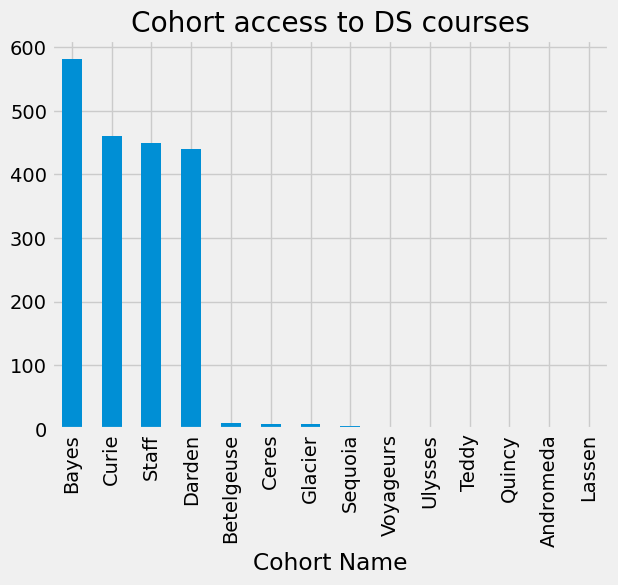

In [142]:
# Visualization of cohort access at x date
usecheck[usecheck.path == '1-fundamentals/1.1-intro-to-data-science'].name.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Cohort access to DS courses')
plt.xlabel('Cohort Name')
plt.show()

## Looking at DS Students viewing Web Dev curriculum

In [147]:
usecheck[(usecheck.path.str.contains('java',na=False)) | (usecheck.path.str.contains('css',na=False)) & (usecheck.program_id == 'Data Science')]

# In all activity history there are only 33 DS students viewing WD curriculumd

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,time
datetime,,,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,Web Dev 1,2018-01-26 09:56:02
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,Web Dev 1,2018-01-26 09:56:05
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,Fullstack,2018-01-26 09:56:24
2018-01-26 09:56:41,javascript-i/loops,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,Fullstack,2018-01-26 09:56:41
2018-01-26 09:56:46,javascript-i/conditionals,3,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,Fullstack,2018-01-26 09:56:46
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-14 16:37:53,examples/java/MoviesArray.java,671,58,24.243.67.104,Hyperion,2020-05-26,2020-11-10,2020-05-26 19:22:44,2020-05-26 19:22:44,Fullstack,2020-08-14 16:37:53
2020-08-14 16:38:06,examples/java/MoviesArray.java,671,58,24.243.67.104,Hyperion,2020-05-26,2020-11-10,2020-05-26 19:22:44,2020-05-26 19:22:44,Fullstack,2020-08-14 16:38:06
2020-08-14 16:38:58,javascript-i/loops,720,-1,66.25.163.198,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-14 16:38:58


In [128]:
# gathering activity counts from ds & web dev
    # ds
dspre = ds[ds.index > timeback]
ds_activity_counts = dspre.groupby([dspre.index.year,dspre.index.month,'program_id']).size().unstack(fill_value=0)
    # wd
wdpre = wd[wd.index > timeback]
wd_activity_counts = wdpre.groupby([wdpre.index.year,wdpre.index.month,'program_id']).size().unstack(fill_value=0)


In [227]:
# All activity on time delta'd dataframe
# 
# data use check
dsusecheck = df[df.path == '1-fundamentals/1.1-intro-to-data-science']
dsusecheck.groupby([dsusecheck.index.year,dsusecheck.index.month,'program_id']).size().unstack(fill_value=0).plot(figsize=(18,8))
plt.show()

dsusecheck

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,time,contains_word
datetime,,,,,,,,,,,,
2019-08-19 13:45:37,1-fundamentals/1.1-intro-to-data-science,1,28,97.105.19.58,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,Staff,2019-08-19 13:45:37,True
2019-08-19 16:35:27,1-fundamentals/1.1-intro-to-data-science,146,28,97.105.19.58,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,Staff,2019-08-19 16:35:27,True
2019-08-19 16:35:33,1-fundamentals/1.1-intro-to-data-science,146,28,97.105.19.58,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,Staff,2019-08-19 16:35:33,True
2019-08-19 16:37:45,1-fundamentals/1.1-intro-to-data-science,146,28,97.105.19.58,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,Staff,2019-08-19 16:37:45,True
2019-08-20 08:50:34,1-fundamentals/1.1-intro-to-data-science,11,28,97.105.19.58,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,Staff,2019-08-20 08:50:34,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-23 18:26:52,1-fundamentals/1.1-intro-to-data-science,905,137,66.69.44.254,Florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,Data Science,2021-03-23 18:26:52,True
2021-03-30 08:55:42,1-fundamentals/1.1-intro-to-data-science,906,137,75.1.203.41,Florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,Data Science,2021-03-30 08:55:42,True
2021-04-05 09:18:33,1-fundamentals/1.1-intro-to-data-science,907,137,69.154.54.95,Florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,Data Science,2021-04-05 09:18:33,True


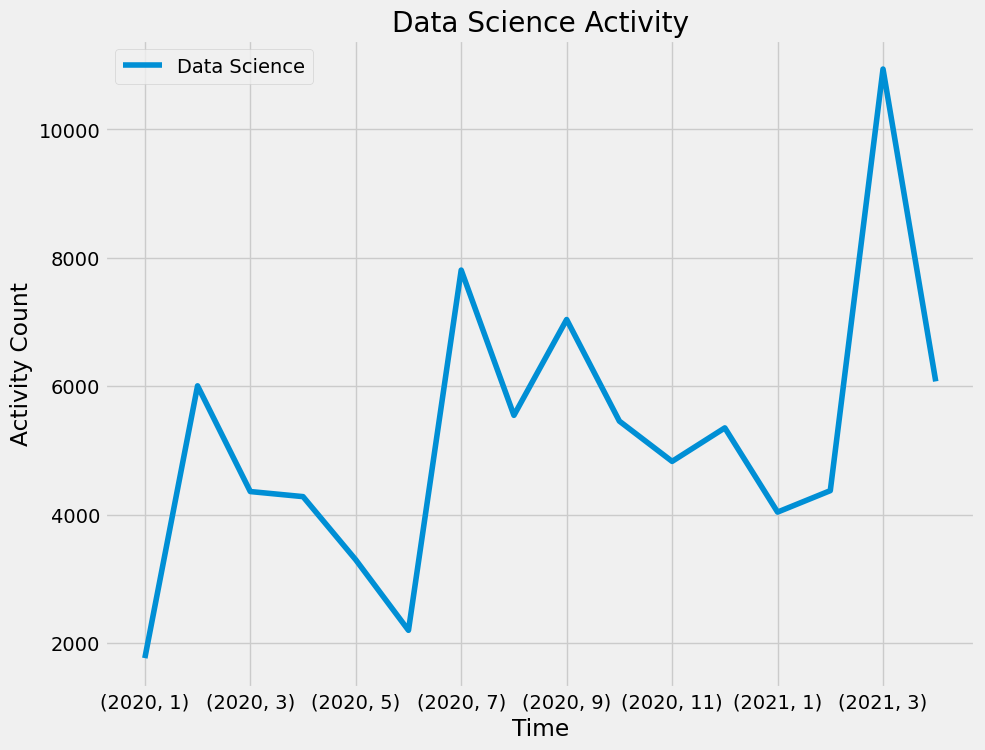

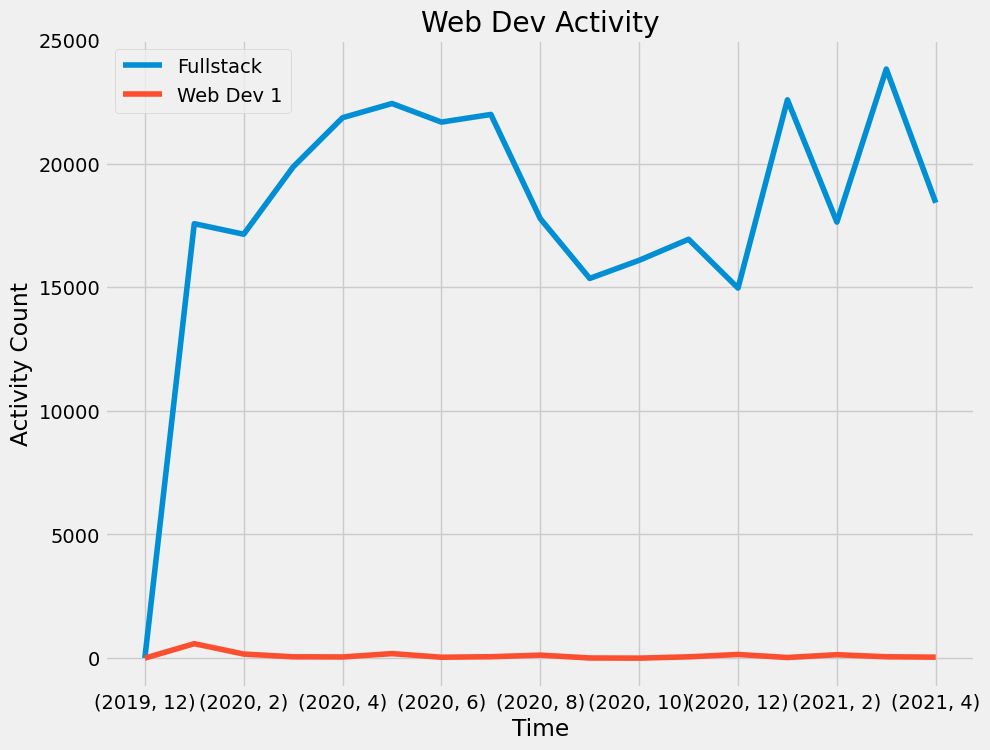

In [108]:
fig1 = ds_activity_counts = dspre.groupby([dspre.index.year,dspre.index.month,'program_id']).size().unstack(fill_value=0).plot(figsize=(10,8))
fig1.set_title('Data Science Activity')
fig1.set_xlabel('Time')
fig1.set_ylabel('Activity Count')
fig1.legend()
plt.show()

# Web Dev Activity on 
wdpre.groupby([wdpre.index.year,wdpre.index.month,'program_id']).size().unstack(fill_value=0).plot(figsize=(10,8))
plt.title('Web Dev Activity')
plt.xlabel('Time')
plt.ylabel('Activity Count')
plt.legend()
plt.show()


### Q5 Answer:
    Does not appear to be major changes to activity from program to program. Access to other program material was minimal but also does seem to be access revoked.

# Question 4

    4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

### Q4 Answer: A user has been identified with no cohort assigned and no other associated information.
- Let's call them sus user.

In [151]:
sus_user = df[df.user_id == 720]

In [213]:
sus_user

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,time
datetime,,,,,,,,,,,
2020-07-21 09:15:12,/,720,-1,66.25.163.198,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-21 09:15:12
2020-07-21 09:17:44,toc,720,-1,66.25.163.198,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-21 09:17:44
2020-07-21 09:22:13,html-css,720,-1,66.25.163.198,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-21 09:22:13
2020-07-21 09:33:25,html-css/introduction,720,-1,66.25.163.198,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-21 09:33:25
2020-07-21 11:34:06,html-css/elements,720,-1,66.25.163.198,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-21 11:34:06
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-15 13:59:18,appendix/professional-development/job-search-workshop,720,-1,68.206.255.72,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-15 13:59:18
2021-04-18 20:21:52,/,720,-1,68.206.255.72,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-18 20:21:52
2021-04-18 20:32:55,/,720,-1,68.206.255.72,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-18 20:32:55


### Sus user could be a number of identified individuals or just one, but utilizes 12 different ip addresses.

In [156]:
print(sus_user.ip.unique())
print(sus_user.ip.nunique())

['66.25.163.198' '208.180.231.166' '174.246.192.249' '174.197.8.191'
 '174.197.5.134' '66.192.13.38' '174.246.192.173' '174.246.194.166'
 '174.197.1.235' '174.235.0.88' '47.218.196.226' '68.206.255.72']
12


### Although labeled as a Data Science student, they have been accessing a lot of web dev curriculum.

In [162]:
sus_user[sus_user.path != '/'].path.value_counts().head(15)

path
toc                                  75
java-iii                             62
javascript-i                         49
spring                               43
java-ii                              42
java-i                               36
java-iii/servlets                    30
mysql                                25
search/search_index.json             25
javascript-i/conditionals            24
java-iii/jsp-and-jstl                23
spring/fundamentals/relationships    23
appendix                             22
java-ii/file-io                      21
mysql/databases                      21
Name: count, dtype: int64

## Question 7

    7. Which lessons are least accessed?

In [192]:
df[(df.path != '/') & (df.path != 'search/search_index.json') & (df.path != 'toc')].groupby('path',)['program_id'].count().sort_values(ascending=False).head(10)



path
javascript-i     18203
java-iii         13166
html-css         13127
java-ii          12177
spring           11883
jquery           11041
mysql            10611
java-i           10467
javascript-ii    10294
appendix          8063
Name: program_id, dtype: int64

### There are numerous lessons that have been accessed only once, we can group by major lessons and see which have been accessed the least amount
### utilizing some keywords from paths

In [191]:
curriculums = ['java','css','html','sql','classification','anomaly','clustering','nlp','regression','stat','jquery','spring','fundamentals','appendix']

In [195]:
# for c in curriculums:
#     df[(df.path.str.contains(curriculums,na=False))]

df[df.path.isin(curriculums)]

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,time
datetime,,,,,,,,,,,
2018-01-26 10:18:24,spring,10,21,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,Fullstack,2018-01-26 10:18:24
2018-01-26 10:35:29,spring,16,21,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,Fullstack,2018-01-26 10:35:29
2018-01-26 11:40:35,spring,27,21,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,Fullstack,2018-01-26 11:40:35
2018-01-26 14:18:07,spring,42,21,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,Fullstack,2018-01-26 14:18:07
2018-01-26 15:15:57,spring,10,21,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,Fullstack,2018-01-26 15:15:57
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 15:31:41,spring,951,28,76.192.103.34,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,Staff,2021-04-21 15:31:41
2021-04-21 15:32:33,jquery,875,135,24.242.150.231,Marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,Fullstack,2021-04-21 15:32:33
2021-04-21 15:52:21,spring,890,135,70.239.184.149,Marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,Fullstack,2021-04-21 15:52:21


In [196]:
df['contains_word'] = df['path'].str.contains('|'.join(curriculums))

In [211]:
df[df.contains_word == False].path.value_counts().head(20)

path
/                                                   50313
search/search_index.json                            19519
toc                                                 18297
appendix                                             8308
appendix/capstone-workbook                           2148
mkdocs/search_index.json                             1910
capstone                                             1276
capstone/workbook                                    1013
appendix/cli-git-overview                             979
appendix/pair-programming                             911
appendix/professional-development/t-block-resume      849
appendix/slides                                       829
python/data-types-and-variables                       793
capstone/sw-project-planning                          776
examples/bootstrap-grid/assets.zip                    718
appendix/capstone-workbook/sw-project-planning        709
appendix/extra-challenges/basic-challenges            701
Intro_to_

### Q7 Answer: The content on the appendix sections of both curriculums seems to be the least accessed. Naturally as this is extra material.